In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# 🌿 Cluster 002: Terpene Insights

_Datenexploration und Analyse der Terpenprofile aus dem Leafly Strain Dataset_

---

## Inhaltsverzeichnis

1. [Setup & Overview](#setup--overview)
2. [DataFrame Struktur](#dataframe-struktur)
3. [Deskriptive Statistik](#deskriptive-statistik)
4. [Visualisierung der Terpene](#visualisierung-der-terpene)
5. [Weitere Analysen & Ideen](#weitere-analysen--ideen)
6. [Fazit & To Dos](#fazit--to-dos)

---


## <a id="setup--overview"></a>1. Setup & Overview

-   Dieses Notebook untersucht die wichtigsten Terpene verschiedener Strains.
-   Alle Werte sind Median (%) oder Scores, je nach Datenquelle.

---


In [69]:
# import
df = pd.read_csv("../csv/strains.csv")
df = df.set_index("id").sort_values("id")

In [70]:
# b) Terpene
df_terpenes = df[
    [
        "name",
        "terp_caryophyllene_score",
        "terp_humulene_score",
        "terp_limonene_score",
        "terp_linalool_score",
        "terp_myrcene_score",
        "terp_ocimene_score",
        "terp_pinene_score",
        "terp_terpinolene_score",
        "averageRating",
    ]
].rename(
    columns={
        "terp_caryophyllene_score": "Caryophyllene",
        "terp_humulene_score": "Humulen",
        "terp_limonene_score": "Limonen",
        "terp_linalool_score": "Linalool",
        "terp_myrcene_score": "Mycene",
        "terp_ocimene_score": "Ocimene",
        "terp_pinene_score": "Pinen",
        "terp_terpinolene_score": "Terpinolen",
        "averageRating": "Rating",
    }
)

---
## <a id="dataframe-struktur"></a>2. DataFrame Struktur

- Überblick über Spalten und Beispiel-Daten (`df_terpenes.head()`, `df_terpenes.info()`).
- Felder: name, caryophyllene_score, humulene_score, limonene_score, linalool_score, myrcene_score, ocimene_score, pinene_score, terpinolene_score.
---


In [71]:
df_terpenes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8492 entries, 1 to 518764
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8492 non-null   object 
 1   Caryophyllene  3641 non-null   float64
 2   Humulen        3641 non-null   float64
 3   Limonen        3641 non-null   float64
 4   Linalool       3641 non-null   float64
 5   Mycene         3641 non-null   float64
 6   Ocimene        3641 non-null   float64
 7   Pinen          3641 non-null   float64
 8   Terpinolen     3641 non-null   float64
 9   Rating         8492 non-null   float64
dtypes: float64(9), object(1)
memory usage: 729.8+ KB


In [72]:
df_terpenes.head()

,name,Caryophyllene,Humulen,Limonen,Linalool,Mycene,Ocimene,Pinen,Terpinolen,Rating
id,,,,,,,,,,
1,AK-47,0.294669,0.101312,0.129213,0.049176,1.085450,0.026986,0.455796,0.022313,4.060496
2,Chemdawg,0.449714,0.152827,0.284038,0.048102,0.378439,0.007928,0.102327,0.019300,4.262460
3,Mr. Nice Guy,0.335400,0.095300,0.316200,0.098200,0.336300,0.034400,0.099100,0.001000,4.103067
6,Super Silver Haze,0.296869,0.107192,0.169750,0.062835,0.469370,0.010418,0.118218,0.018945,4.355109
7,Northern Lights #5,0.149105,0.070376,0.111898,0.065269,0.199376,0.058726,0.382547,0.281058,4.267677


---

## <a id="deskriptive-statistik"></a>3. Deskriptive Statistik

- Verteilungen, Kenngrößen, Ausreißer.
- Genutzte Methoden: `describe()`, `isnull().sum()`, `mean()`, `median()`, `quantile()`, `corr()`.
- Besonderheiten und Anmerkungen.

---


In [73]:
df_terpenes.describe()

,Caryophyllene,Humulen,Limonen,Linalool,Mycene,Ocimene,Pinen,Terpinolen,Rating
count,3641.000000,3641.000000,3641.000000,3641.000000,3641.000000,3641.000000,3641.000000,3641.000000,8492.000000
mean,0.352884,0.117686,0.285296,0.108516,0.435062,0.045157,0.202359,0.089165,3.973796
std,0.215479,0.072688,0.203753,0.082294,0.373052,0.100829,0.182808,0.222846,1.500643
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.197000,0.068000,0.124200,0.049270,0.171870,0.000000,0.100000,0.004500,4.150364
50%,0.309333,0.104167,0.243333,0.088333,0.337727,0.009111,0.151667,0.017825,4.500000
75%,0.468717,0.152601,0.400000,0.150000,0.589646,0.045320,0.240000,0.030000,4.727273
max,1.870000,0.680000,1.580000,0.595000,3.080500,1.429346,2.497889,1.952000,5.000000


In [74]:
df_terpenes.isnull().sum()

name                0
Caryophyllene    4851
Humulen          4851
Limonen          4851
Linalool         4851
Mycene           4851
Ocimene          4851
Pinen            4851
Terpinolen       4851
Rating              0
dtype: int64

In [75]:
df_terpenes.nunique()

name             8486
Caryophyllene    2655
Humulen          2335
Limonen          2617
Linalool         2302
Mycene           2689
Ocimene          1507
Pinen            2484
Terpinolen       1486
Rating           1483
dtype: int64

In [97]:
# Extremwerte/Ausreißer identifizieren

df_terpenes[df_terpenes["Caryophyllene"] > df_terpenes["Caryophyllene"].quantile(0.99)][
    ["Rating", "name", "Caryophyllene"]
].sort_values("Caryophyllene", ascending=False)

,Rating,name,Caryophyllene
id,,,
516334,4.923077,Black Cherry Gushers,1.870000
506190,4.677419,London Mints,1.690000
511891,4.285714,Blueberry Shortcake,1.600000
511147,4.500000,Gas Leak,1.527000
506040,5.000000,Flatbrainer,1.476667
515241,5.000000,Sangiovese,1.414000
506126,4.600000,Z OG,1.370000
149647,4.626866,Green Lantern,1.350500
514858,4.500000,Cherry Burger,1.330000


In [96]:
# Extremwerte/Ausreißer identifizieren
df_terpenes[df_terpenes["Humulen"] > df_terpenes["Humulen"].quantile(0.99)][
    ["Rating", "name", "Humulen"]
].sort_values("Humulen", ascending=False)

,Rating,name,Humulen
id,,,
506126,4.600000,Z OG,0.680000
501854,5.000000,Tarmonster,0.660000
506040,5.000000,Flatbrainer,0.583333
502712,4.857143,Humboldt Sour Diesel,0.565000
503705,4.600000,Cookies Haze,0.550000
510127,4.714286,Sherbert Cake,0.490000
514858,4.500000,Cherry Burger,0.470000
515241,5.000000,Sangiovese,0.460000
506883,4.730769,Nutter Butter,0.450000


In [95]:
df_terpenes[df_terpenes["Limonen"] > df_terpenes["Limonen"].quantile(0.99)][
    ["Rating", "name", "Limonen"]
].sort_values("Limonen", ascending=False)

,Rating,name,Limonen
id,,,
515202,4.937500,Grape Gelato,1.580000
514757,4.606061,Airheads,1.331000
514702,4.818182,Chauffeur,1.300000
505324,4.708333,Garlicane,1.255430
123663,4.769231,Supermax OG,1.236200
514699,4.518519,Animal Tree,1.205000
288145,4.367647,Pink Starburst,1.137667
512726,0.000000,Gnu Glue,1.130000
508321,0.000000,Thai Pearl,1.095000


In [94]:
df_terpenes[df_terpenes["Linalool"] > df_terpenes["Linalool"].quantile(0.99)][
    ["Rating", "name", "Linalool"]
].sort_values("Linalool", ascending=False)

,Rating,name,Linalool
id,,,
506142,3.000000,Camelback OG,0.595000
514702,4.818182,Chauffeur,0.580000
744,4.377778,Pluto Kush,0.550000
505109,4.596154,Purple Gelato,0.530000
516353,4.750000,Cherry Cosmo,0.530000
515202,4.937500,Grape Gelato,0.510000
515153,4.692308,Puro Loco,0.490000
506126,4.600000,Z OG,0.490000
506557,4.705882,Old Family Purple,0.486667


In [93]:
df_terpenes[df_terpenes["Mycene"] > df_terpenes["Mycene"].quantile(0.99)][
    ["Rating", "name", "Mycene"]
].sort_values("Mycene", ascending=False)

,Rating,name,Mycene
id,,,
505786,3.500000,Tsi Fly,3.080500
294993,4.000000,Chocoholic,2.997297
506368,4.222222,Double OG Chem,2.960000
113105,4.611111,Gemstone,2.810000
503103,4.529412,American Pie,2.620000
505849,0.000000,Blue Bean,2.499929
58096,4.558282,Alien Walker,2.452667
514757,4.606061,Airheads,2.408000
3637,4.071429,Maui,2.355316


In [92]:
df_terpenes[df_terpenes["Ocimene"] > df_terpenes["Ocimene"].quantile(0.99)][
    ["Rating", "name", "Ocimene"]
].sort_values("Ocimene", ascending=False)

,Rating,name,Ocimene
id,,,
199216,4.595238,Blue Sky,1.429346
508248,4.500000,Ambulance,1.349344
501796,4.882353,Deep Breath,1.268900
912,3.791209,Deep Purple,1.126941
241616,3.857143,Sweet Nina,1.015000
226321,4.820000,Moose and Lobsta,1.011176
502887,4.447368,Birds of Paradise,0.944167
251119,4.433962,Pineapple Fields,0.921667
505960,4.500000,Lemon Tart,0.900000


In [90]:
df_terpenes[df_terpenes["Pinen"] > df_terpenes["Pinen"].quantile(0.99)][
    ["Rating", "name", "Pinen"]
].sort_values("Pinen", ascending=False)

,Rating,name,Pinen
id,,,
507623,4.625000,Nightcap,2.497889
510297,4.250000,Gorilla Haze,1.963000
505300,4.593220,Cherry Gorilla,1.668362
505845,4.800000,Avalanche,1.570000
510981,3.000000,Boss Frost,1.528000
512743,4.375000,Motorhead,1.450000
258127,5.000000,Euphoria Cookies,1.412888
301391,5.000000,Bubba Hash,1.401962
515173,4.500000,Fuzzy Melon,1.400000


In [91]:
quantile_terpinolen = df_terpenes[
    df_terpenes["Terpinolen"] > df_terpenes["Terpinolen"].quantile(0.99)
][["Rating", "name", "Terpinolen"]]
quantile_terpinolen.sort_values("Terpinolen", ascending=False)

,Rating,name,Terpinolen
id,,,
240530,4.800000,Sugar Pine,1.952000
160367,4.444444,Dreamer’s Glass,1.890000
512200,5.000000,Supa Durban,1.627647
506075,5.000000,Mint Durban,1.623333
506812,4.375000,Chocolate Oranges,1.600000
8,4.070342,Snowcap,1.586400
510020,4.600000,Pear Herer,1.580000
510118,4.000000,Pineapple Durban,1.560000
506207,4.333333,Papayahuasca,1.520000


In [84]:
print("MAX:  \n", df_terpenes.idxmax(), "\n\nMIN:  \n", df_terpenes.idxmin())

MAX:  
 name             504333
Caryophyllene    516334
Humulen          506126
Limonen          515202
Linalool         506142
Mycene           505786
Ocimene          199216
Pinen            507623
Terpinolen       240530
Rating            62960
dtype: int64 

MIN:  
 name             516532
Caryophyllene     76946
Humulen             148
Limonen             233
Linalool            392
Mycene           212847
Ocimene               8
Pinen            143503
Terpinolen           47
Rating           139152
dtype: int64


---
## <a id="visualisierung-der-terpene"></a>4. Visualisierung der Terpene

- Histogramme, Boxplots, Scatterplots (z.B. Limonene vs. Myrcene).
- Interaktive Plots mit Plotly oder klassische mit Matplotlib.
---


In [85]:
# Mögliche Korrelationen
df_terpenes.corr(numeric_only=True)

,Caryophyllene,Humulen,Limonen,Linalool,Mycene,Ocimene,Pinen,Terpinolen,Rating
Caryophyllene,1.000000,0.899922,0.363939,0.372073,-0.140987,-0.157652,-0.121906,-0.143407,0.047793
Humulen,0.899922,1.000000,0.322147,0.337573,-0.141258,-0.129004,-0.133626,-0.130973,0.036720
Limonen,0.363939,0.322147,1.000000,0.562170,-0.140578,-0.137822,0.013042,-0.148567,0.049400
Linalool,0.372073,0.337573,0.562170,1.000000,-0.122647,-0.165112,-0.095897,-0.201603,0.044277
Mycene,-0.140987,-0.141258,-0.140578,-0.122647,1.000000,0.199393,0.292870,-0.067529,-0.016210
Ocimene,-0.157652,-0.129004,-0.137822,-0.165112,0.199393,1.000000,0.150016,0.298766,-0.022125
Pinen,-0.121906,-0.133626,0.013042,-0.095897,0.292870,0.150016,1.000000,0.020245,0.008857
Terpinolen,-0.143407,-0.130973,-0.148567,-0.201603,-0.067529,0.298766,0.020245,1.000000,-0.012346
Rating,0.047793,0.036720,0.049400,0.044277,-0.016210,-0.022125,0.008857,-0.012346,1.000000


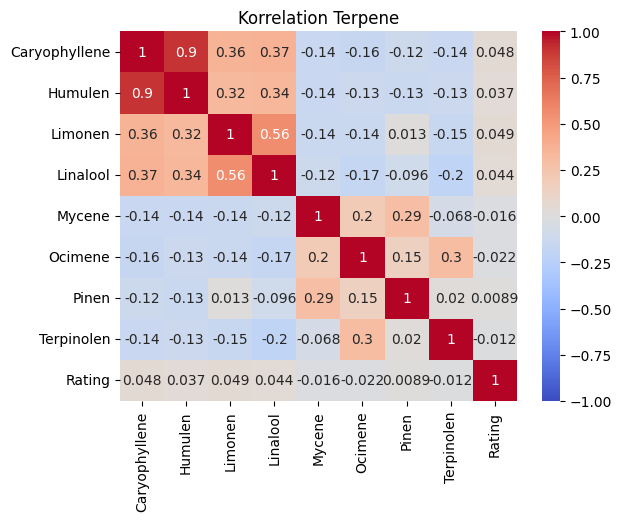

In [86]:
# Mögliche Korrelationen: Heatmap
sns.heatmap(df_terpenes.corr(numeric_only=True), annot=True, cmap="coolwarm", vmin=-1.0)
plt.title("Korrelation Terpene")
plt.show()

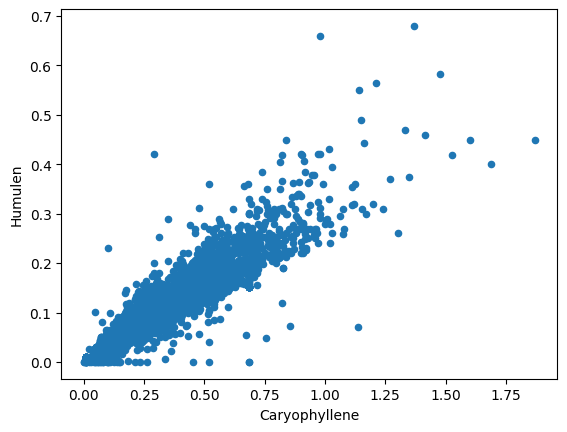

In [87]:
# Mögliche Korrelation zwischen Caryophyllene und Humulen
df_terpenes.plot.scatter(x="Caryophyllene", y="Humulen")
plt.show()

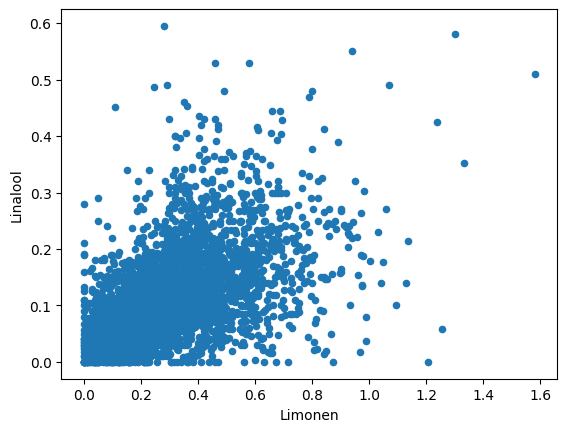

In [88]:
# Mögliche Korrelation zwischen Linalool und Limonen
df_terpenes.plot.scatter(x="Limonen", y="Linalool")
plt.show()

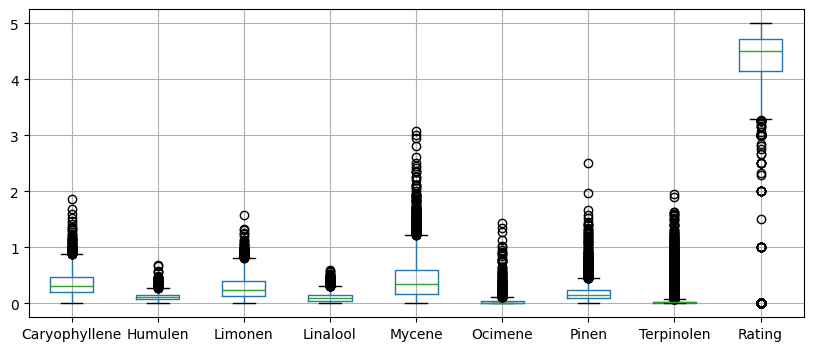

In [89]:
df_terpenes.boxplot(figsize=(10, 4))
plt.show()

---
## <a id="weitere-analysen--ideen"></a>5. Weitere Analysen & Ideen

- (Platz für Clusterings, spannende Strains, Korrelationen etc.)
- Hier können bei Bedarf noch Deep Dives oder Ausreißer-Betrachtungen ergänzt werden.
---

To Do:

-   Wie verteilen sich die Terpene pro Kategorie (Indica/Sativa/Hybrid)?
-   'Terpen-Profile' oder Cluster vorhanden? (-> ggf. 'Terpen Diversity Index')
-   Top 10 der Terpene abbilden


---
## <a id="fazit--to-dos"></a>6. Fazit

- Wichtigste Erkenntnisse der Analyse.
- Eventuelle offene Fragen und nächste Schritte.
---
